# Implementation Natural Language Descriptions of Deep Visual Features


In [26]:
# load Libraries
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from PIL import Image
import os

1/1 [==============================] - 0s 327ms/step


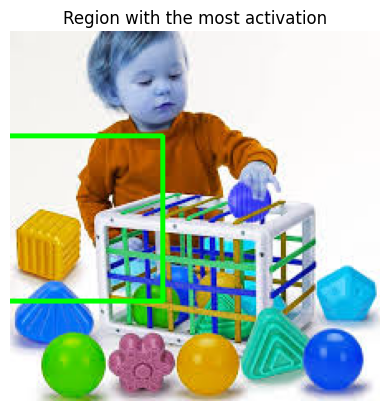

1/1 [==============================] - 0s 164ms/step


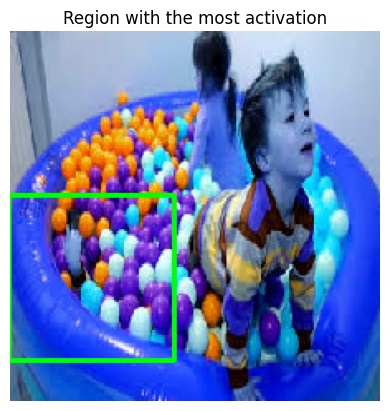

1/1 [==============================] - 0s 153ms/step


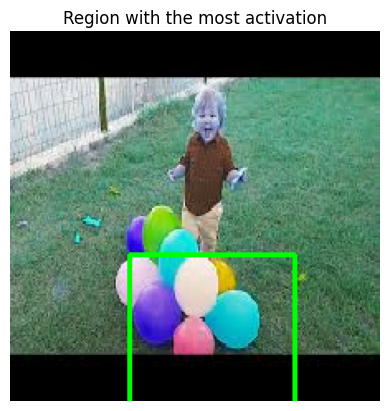

1/1 [==============================] - 0s 155ms/step


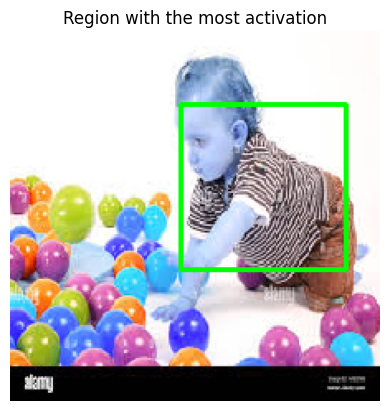

1/1 [==============================] - 0s 153ms/step


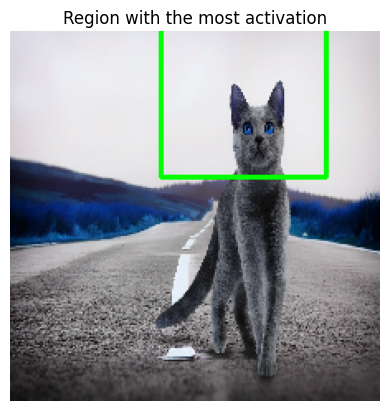

1/1 [==============================] - 0s 154ms/step


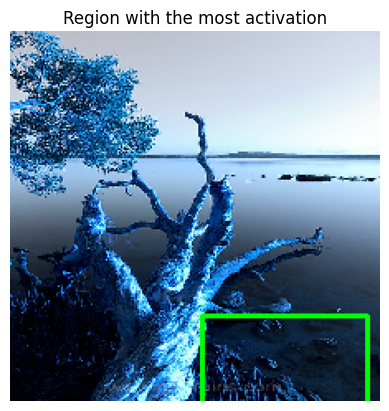

1/1 [==============================] - 0s 169ms/step


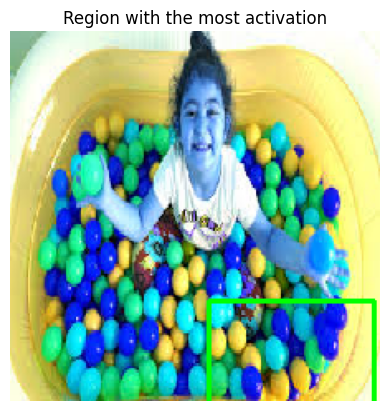

1/1 [==============================] - 0s 169ms/step


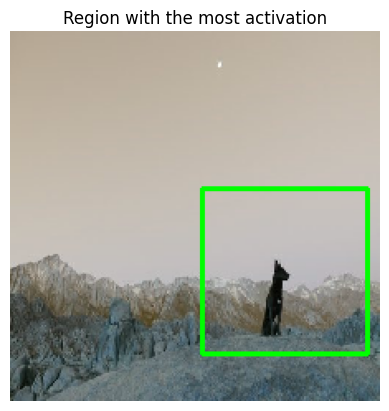

1/1 [==============================] - 0s 151ms/step


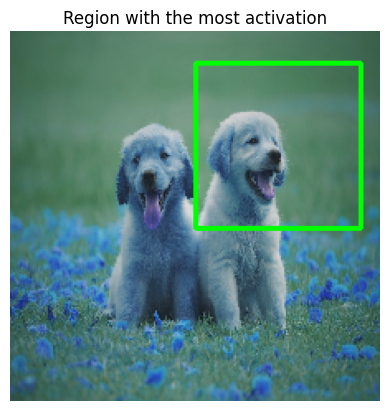

1/1 [==============================] - 0s 155ms/step


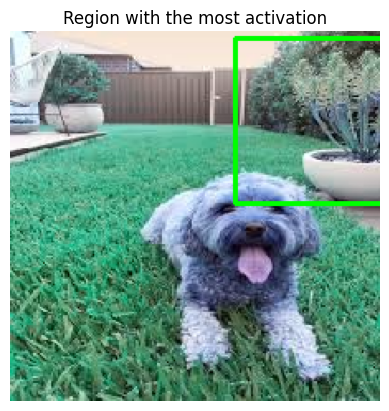

In [28]:
# Specify directory
dataset_dir = '/content/dataset'

# Load the pre-trained model of VGG16
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block3_conv1').output)

# Iterate over the images in the dataset directory
for filename in os.listdir(dataset_dir):
    if filename.endswith('.jpg') or filename.endswith('.jpeg'):  # Check if the file is an image
        img_path = os.path.join(dataset_dir, filename)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = tf.keras.applications.vgg16.preprocess_input(x)

        # Obtain the activation of a specific neuron in the last convolutional layer
        layer_output = model.predict(x)
        activation = layer_output[0, :, :, 4]

        # Normalize the activation
        activation -= activation.mean()
        activation /= (activation.std() + 1e-5)  # Add a small epsilon value to avoid dividing by zero

        # Resize the activation to match the size of the original image
        activation = cv2.resize(activation, img.size)
        activation = np.maximum(activation, 0)

        # Find the indexes of the maximum activation value
        max_index = np.unravel_index(np.argmax(activation), activation.shape)
        y, x = max_index  # Coordinates (row, column) of the maximum value

        # Convert the image to an array of NumPy
        img_np = np.array(img)

        # Draw a rectangle around the region of maximum activation in the original image.
        highlighted_img = img_np.copy()
        cv2.rectangle(highlighted_img, (x-50, y-50), (x+50, y+50), (0, 255, 0), 2)  # Draw a green rectangle

        # Convert the image back to PIL format for viewing
        highlighted_img = cv2.cvtColor(highlighted_img, cv2.COLOR_BGR2RGB)
        highlighted_img_pil = Image.fromarray(highlighted_img)

        # Display the original image with the rectangle highlighted.
        plt.imshow(highlighted_img_pil)
        plt.title('Region with the most activation')
        plt.axis('off')
        plt.show()

## Description of the region with the most activation

In [ ]:
!pip install langchain

In [ ]:
!pip install python-dotenv

In [ ]:
!pip install openai

In [11]:
#Load libraries
import base64
from langchain.chat_models import ChatOpenAI
from langchain.schema.messages import HumanMessage, AIMessage
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())

False

In [12]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

In [ ]:
chain = ChatOpenAI(model="gpt-4-vision-preview", max_tokens=1024, openai_api_key='xxxxxxxxxx-xxxxxxxxx-xxxxxxxxx')

In [ ]:
image = encode_image("T4.png")


msg = chain.invoke(
    [   AIMessage(
        content="You are a useful bot that is especially good at OCR from images trained to describe only what is inside of a green box in the image. You should start your answer with: Within the region that generates the highest activation of the selected neuron there is"
    ),
        HumanMessage(
            content=[
                {"type": "text", "text": "Identify what is inside the green square in this image"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{image}"
                    },
                },
            ]
        )
    ]
)
print(msg.content)

Within the region that generates the highest activation of the selected neuron, there is a part of a colorful toy structure with blue and green vertical bars. The structure appears to be a type of activity cube that is often used for infant and toddler play.


In [ ]:

msg = chain.invoke([
    AIMessage(
        content="I will give you 4 descriptions of the areas where a neuron is most active in a set of 4 images. Each description corresponds to each image. Find what is in common to say what each neuron specializes in. use maximun 5 tokens. 1. Within the region that generates the highest activation of the selected neuron, there is a collection of colorful plastic balls, predominantly blue and yellow in color. 2. Within the region that generates the highest activation of the selected neuron there is a collection of colorful balls, likely plastic, that are commonly found in a ball pit. These balls appear in various colors such as purple, orange, white, and blue, and are contained within what seems to be an inflatable pool or ball pit structure. 3. Within the region that generates the highest activation of the selected neuron there is a cluster of colorful balloons, including purple, blue, and green ones. The balloons appear to be lying on the grass. 4. Within the region that generates the highest activation of the selected neuron, there is a part of a colorful toy structure with blue and green vertical bars. The structure appears to be a type of activity cube that is often used for infant and toddler play."
    ),
    HumanMessage(
        content=[
            {"type": "text", "text": "What do you want to ask?"}
        ]
    )
])
print(msg.content)
